

# Project: Investigate a TMDb Movie data

 ## Table of Contents
 <ul>
 <li><a href="#intro">Introduction</a></li>
 <li><a href="#wrangling">Data Wrangling</a></li>
 <li><a href="#eda">Exploratory Data Analysis</a></li>
 <li><a href="#conclusions">Conclusions</a></li>
 </ul>

<a id='intro'></a>
## Introduction

> In this report I am going to explore TMDb movie data from Kaggle. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

> Questions we are trying to answer in the following analysis include: 
> * Which movie was the most popular, which received highest average vote and which movie received highest number of votes?
> * Which genres are most popular from year to year? 
> * How did popularity of movies change over the years?
> * Has movie industry become more profitable over time? 

> **Notes:** 
> * Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. For this analysis we are going to leave them as is.
> * The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

In [453]:
# To start, lets import packages to be used in this project:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I am going to load in the data, check for cleanliness, and then trim and clean my dataset for analysis. Each step is documented along the way with its corresponding outcome and conclusions. 

### General Properties

In [454]:
# Loading data and printing out top 5 lines to understand the data:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [455]:
#Lets look at some stats for our data by running the describe command:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> Based on the above result we observe the following about our dataset: 
> * The earliest release date was 1960 and the latest released movie was in 2015
> * Per **Runtime** column, the shortest movie was 0 minutes and the longest movie was 900 minutes. This indicates that some of the rows might be missing runtime info which is why it is showing 0. Mean movie runtime is 102 minutes.  
> * Budget, revenue and their adjusted values show that there are some lines with 0s. 
> * Vote_count shows that the maximum number of votes per movie was 9767 while the low was 10 votes. 
> * 50% of all votes were rating 6 while the highest vote was 9.2

In [456]:
#Now lets see how many rows and columns are in our dataset:
df.shape

(10866, 21)

> Per above result we see that there are 10866 rows and 21 columns in the dataset. 

In [457]:
#Lets explore the data types in our dataset: 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> **Outcome:** There are multiple columns which are missing data: imdb_id, homepage, cast, director, tagline, keywords, overview, genres and production_companies. 

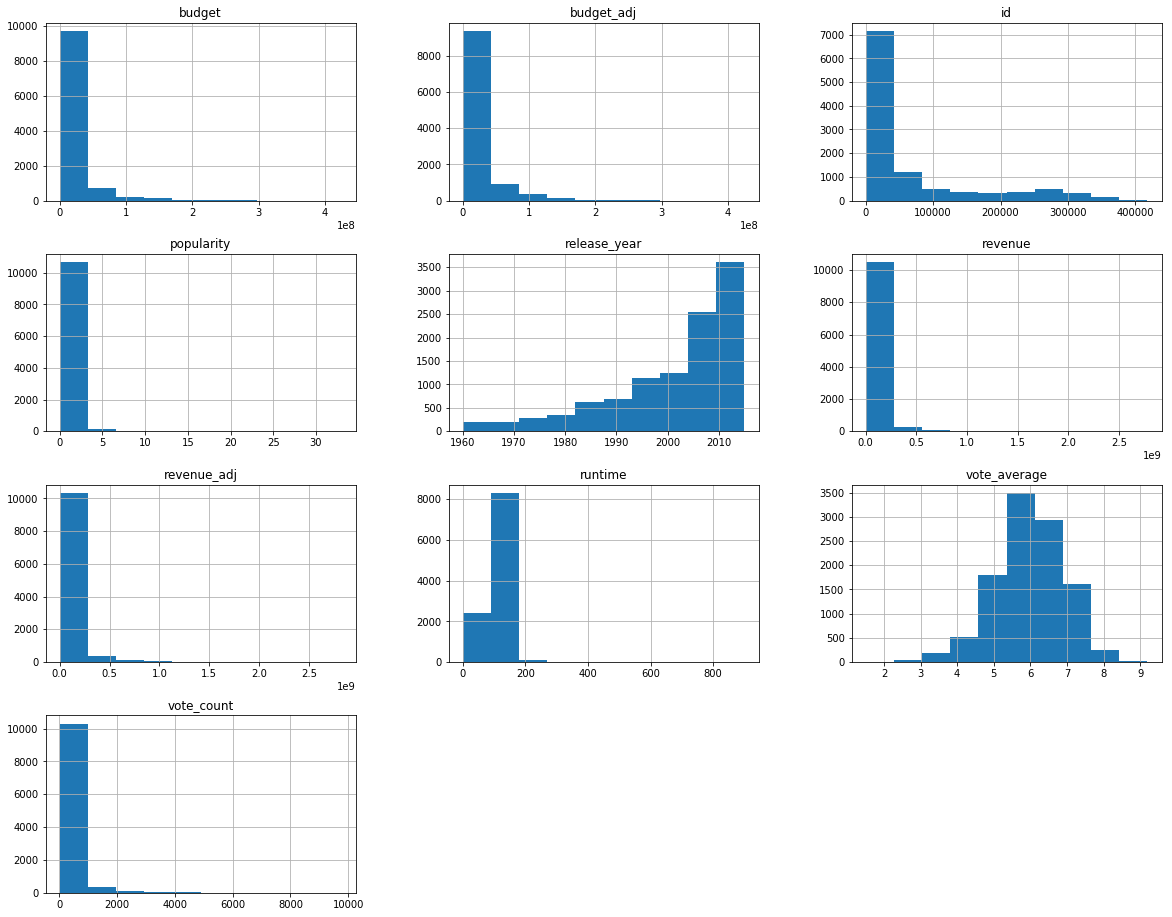

In [458]:
#Next lets create histogram charts to visually explore the data
df.hist(figsize = (20,16));

> **Observations:** Most of the charts above (like budget, popularity, revenue, revenue_adj, vote_count, runtime, budget_adj) are skewed to the right, which is likely caused by missing data and some outliers. Data cleaning will be performed below. 


### Data Cleaning 

Now that we got understanding of our data, lets do some cleaning. 

Not all of the columns are needed for our analysis. Therefore, we are going to drop the unnecessary columns. 

In [459]:
df.drop(['id','homepage','imdb_id','tagline','overview','keywords','cast','production_companies'],axis = 1, inplace = True) 

Lets look at the new dataset:

In [460]:
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.1+ MB


> **Observations:** In our new dataset after dropping the redundant columns there are two columns with null values: director only has 10822 entries and genres has 10843 columns. Lets drop null entry lines. 

In [462]:
#Drop null entry rows
df.dropna(axis = 0, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 13 columns):
popularity        10801 non-null float64
budget            10801 non-null int64
revenue           10801 non-null int64
original_title    10801 non-null object
director          10801 non-null object
runtime           10801 non-null int64
genres            10801 non-null object
release_date      10801 non-null object
vote_count        10801 non-null int64
vote_average      10801 non-null float64
release_year      10801 non-null int64
budget_adj        10801 non-null float64
revenue_adj       10801 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.2+ MB


> **Observation:** New dataset contains 10801 rows with no null values. 

In [463]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10801.000000,1.080100e+04,1.080100e+04,10801.000000,10801.000000,10801.00000,10801.000000,1.080100e+04,1.080100e+04
mean,0.649450,1.471255e+07,4.006196e+07,102.188779,218.590686,5.97079,2001.290343,1.765551e+07,5.167244e+07
std,1.002395,3.098568e+07,1.173144e+08,30.782604,577.139279,0.93301,12.819226,3.438265e+07,1.450123e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.50000,1960.000000,0.000000e+00,0.000000e+00
25%,0.209163,0.000000e+00,0.000000e+00,90.000000,17.000000,5.40000,1995.000000,0.000000e+00,0.000000e+00
50%,0.385492,0.000000e+00,0.000000e+00,99.000000,39.000000,6.00000,2006.000000,0.000000e+00,0.000000e+00
75%,0.717479,1.577495e+07,2.453851e+07,111.000000,147.000000,6.60000,2011.000000,2.103337e+07,3.408478e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.20000,2015.000000,4.250000e+08,2.827124e+09


> **Observation:** Data shows that there is 50% of population have budget of 0 and 50% of population have revenue of 0. 

In [464]:
#Lets take a look at budget and revenue columns in more detail. 
df.query('budget < 1').head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,3.927333,0,29355203,Mr. Holmes,Bill Condon,103,Mystery|Drama,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,3.358321,0,22354572,Solace,Afonso Poyart,101,Crime|Drama|Mystery,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,2.272044,0,45895,Beyond the Reach,Jean-Baptiste LÃ©onetti,95,Thriller,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,2.165433,0,0,Mythica: The Darkspore,Anne K. Black,108,Action|Adventure|Fantasy,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,2.141506,0,0,Me and Earl and the Dying Girl,Alfonso Gomez-Rejon,105,Comedy|Drama,6/12/15,569,7.7,2015,0.0,0.000000e+00


In [465]:
#Similarly lets explore revenue field
df.query('revenue <1').head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,2.932340,30000000,0,Wild Card,Simon West,92,Thriller|Crime|Drama,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,2.331636,20000000,0,Survivor,James McTeigue,96,Crime|Thriller|Action,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,2.165433,0,0,Mythica: The Darkspore,Anne K. Black,108,Action|Adventure|Fantasy,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,2.141506,0,0,Me and Earl and the Dying Girl,Alfonso Gomez-Rejon,105,Comedy|Drama,6/12/15,569,7.7,2015,0.000000e+00,0.0
92,1.876037,0,0,Mythica: The Necromancer,A. Todd Smith,0,Fantasy|Action|Adventure,12/19/15,11,5.4,2015,0.000000e+00,0.0


> **Observation:** Revenue and budget in the dataset doesn't appear consistently: there are instances where there is budget amount but revenue appears 0 and vice versa.

In [466]:
#Given the above observation, lets create a separate dataset that contains both budget and revenue data
#Lets call that dataset df_rev
df_rev = df.loc[:, ['popularity','budget','revenue','original_title','director','runtime','genres','release_date','vote_count','vote_average','release_year','budget_adj','revenue_adj']]
df_rev = df_rev.query('budget > 1 & revenue >1')
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3852 entries, 0 to 10848
Data columns (total 13 columns):
popularity        3852 non-null float64
budget            3852 non-null int64
revenue           3852 non-null int64
original_title    3852 non-null object
director          3852 non-null object
runtime           3852 non-null int64
genres            3852 non-null object
release_date      3852 non-null object
vote_count        3852 non-null int64
vote_average      3852 non-null float64
release_year      3852 non-null int64
budget_adj        3852 non-null float64
revenue_adj       3852 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 421.3+ KB


> The newly created dataset df_rev contains 3852 rows. 

In [467]:
#Now that we have separate dataset for revenue and budget, lets drop those columns from original dataset
df.drop(['budget','budget_adj','revenue','revenue_adj'],axis = 1, inplace = True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 9 columns):
popularity        10801 non-null float64
original_title    10801 non-null object
director          10801 non-null object
runtime           10801 non-null int64
genres            10801 non-null object
release_date      10801 non-null object
vote_count        10801 non-null int64
vote_average      10801 non-null float64
release_year      10801 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 843.8+ KB


> The cleaned version of df dataset contains 10801 rows. 

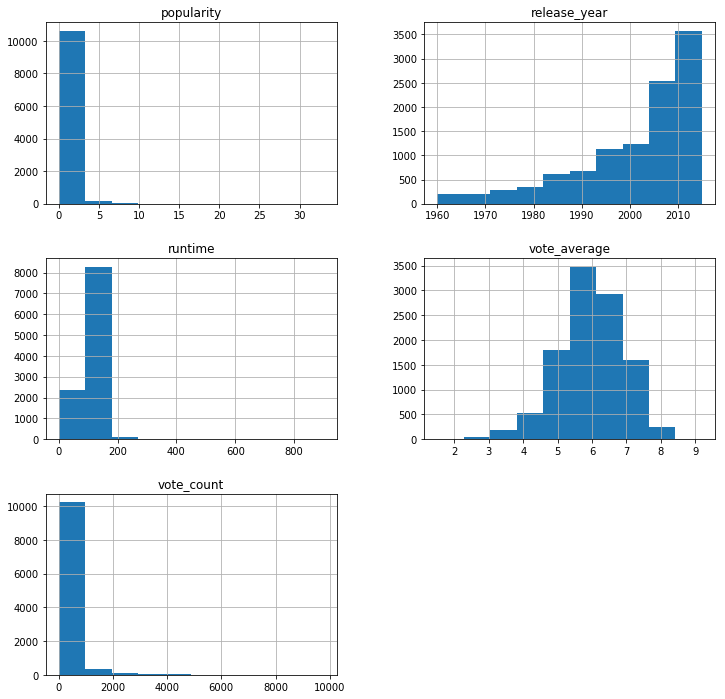

In [468]:
#Lets look at histogram charts of the new data
df.hist(figsize = (12,12));

> **Observation:** Based on the above histograms we see that popularity is skewed to the right meaning that most movies from the dataset has popularity score less than 3. 
> Per release year chart which is skewed to the left, there is an apparent increase in the number of movies after 2000s. 
> Most movies are 200 minutes or less, with some outliers up to 900 minutes. 
> Most movies received between 0 to 1000 votes per movie. 

<a id='eda'></a>
## Exploratory Data Analysis

> Now that we've finished trimming and cleaning, lets explore the data. 

### Research Question 1 (Which movie was the most popular, which received highest average vote and which movie received highest number of votes?)

In [469]:
df.sort_values('popularity',ascending = False).head(1)

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015


In [470]:
df.sort_values('vote_average',ascending = False).head(1)

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
3894,0.006925,The Story of Film: An Odyssey,Mark Cousins,900,Documentary,9/3/11,14,9.2,2011


In [471]:
df.sort_values('vote_count',ascending = False).head(1)

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
1919,9.363643,Inception,Christopher Nolan,148,Action|Thriller|Science Fiction|Mystery|Adventure,7/14/10,9767,7.9,2010


#### **Data findings**:

> * The movie with the highest popularity score is **Jurassic World**
> * The movie with the highest average vote is **The Story of Film: An Odyssey**, which also appears to be the one with the longest runtime (900 minutes)
> * The movie with the highest number of votes is **Inception** which received 9767 votes. 

### Research Question 2 (Which genres are most popular from year to year?)

In [473]:
#For this analysis lets add a new field into our dataset with decades:
decade = (df.release_year//10)*10
df['decade'] = decade

Given that our genres column contains multiple genre per movie divided by "|". For this analysis purposes, lets split the genres column and assign the first genre in the list to the movie. We are making this assumption that the first genre in the list is the primary genre. 

In [513]:
genres = df['genres']

#below function is to split the genres column and create new column
def get_first_genre(genres):
    split_g = genres.split("|")
    if len(split_g)>0 :
        return split_g[0]
    return genres

#add new column called "first_genre" to our dataset 
df['first_genre'] = df.apply(lambda row: get_first_genre(row['genres']), axis=1)

In [514]:
#Lets check our data and that newly created column looks reasonable: 
df.head()

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,decade,first_genre
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,2010,Action
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,2010,Action
2,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,2010,Adventure
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,2010,Action
4,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,2010,Action


In the new dataset we can see our new column and can validate that the first_genre column properly reflects the first genre in the "genres" column. 

In [515]:
#Now lets select a subset of columns to pull only three columns: 
genre_df = df[['popularity','decade','first_genre']]

#Get the mean popularity for each decade and genre:
genre_ranking = genre_df.groupby(['first_genre','decade'], as_index=False)['popularity'].mean()

In [516]:
#Sort the grouped data above by popularity in the Descending order with the highest popularity 
#per genre/decade appearing first:
genre_ranking.sort_values('popularity',ascending = False).head()

,first_genre,decade,popularity
116,Western,2010,1.845836
11,Adventure,2010,1.600636
5,Action,2010,1.432969
93,Science Fiction,2010,1.387767
58,History,1960,1.357317


In [517]:
#Sort the grouped data above by popularity in the Ascending order with the lowest popularity 
#per genre/decade appearing first:
genre_ranking.sort_values('popularity',ascending = True).head()

,first_genre,decade,popularity
30,Documentary,1960,0.087849
55,Foreign,1990,0.110393
56,Foreign,2000,0.125166
57,Foreign,2010,0.150952
48,Fantasy,1960,0.168597


**Observation:** So it appears that the highest popular genres were Western, Adventure, Action, Science Fiction and History while the lowest popularity scores were observed in Documentary, Foreign and Fantasy genres. 

Further, lets see how popularity changed over the years for the above genres. I will be creating a bar chart to see the distribution of genre popularity over the decades. I am also including "Comedy" and "Romance" in the chart even though those are not in the above list.  

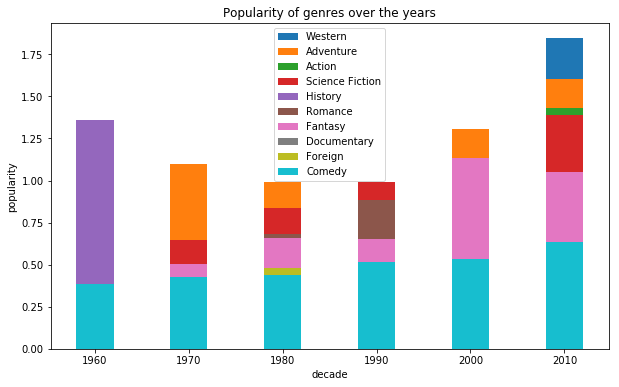

In [512]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(10,6))
width = 4    
for genres in ['Western','Adventure','Action','Science Fiction', 'History','Romance','Fantasy','Documentary','Foreign','Comedy']:
    ax.bar(genre_ranking[genre_ranking.first_genre==genres].decade,
            genre_ranking[genre_ranking.first_genre==genres].popularity,width,label=genres)

ax.set_xlabel("decade")
ax.set_ylabel("popularity")
ax.legend(loc='best')
plt.title('Popularity of genres over the years')
plt.show()

**Observation:** The above bar chart shows some interesting trend. Specifically: 
> * *History* genre obtained highest popularity level in 1960s, however it declined in the following years; 
> * *Comedy* looks pretty consistent over the years and has consistently high popularity score;
> * *Adventure* was most popular in the 1970s and declined in later years. It gained back popularity in 2000 and been consistent ever since. 
> * 2000s was the decade of *Fantasy* and it slowly lost popularity in 2010s giving room for *Science Fiction* which started gaining more popularity. 
> * *Western* appears to have the most popularity in the 2010s. 

## Research Question 3 (How did popularity of movies change over the years?) 

Lets split our population in two groups using the mean of popularity score. 

In [519]:
#Calculating the mean of popularity:
df['popularity'].mean()

0.649449968243681

In [520]:
#Per above the mean of popularity score is ~0.65
#Lets create a new variable called "popular"
popular = df.popularity > 0.65
df['popular'] = popular

In [548]:
#Lets check the data after the above change
df['popular'].describe()

count     10801
unique        2
top       False
freq       7759
Name: popular, dtype: object

Our new data contains new column called "popular", in which anything with True has higher than mean popularity score. 
Anything with False has lower than the mean popularity score. 

#### Lets create a bar chart to see proportion of popular movies over the years:


Text(0.5,1,'Proportion of popular movies over the years')

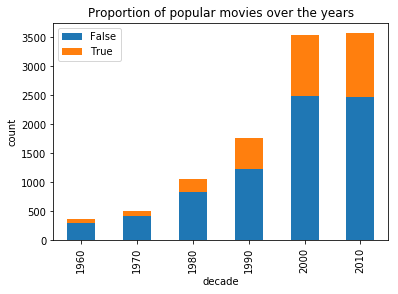

In [549]:
ax = df.groupby(['decade','popular']).size().unstack().plot(kind='bar', stacked=True)

ax.set_xlabel("decade")
ax.set_ylabel("count")
ax.legend(loc='best')
plt.title('Proportion of popular movies over the years')

**Observation:** Overall, per above chart the number of movies has been rising over the years, however proportion of popular movies look consistent. Visually 1980s seem to have lower proportion of popular movies. 2000-2010 has consistent proportion of popular movies. 

## Research Question 4 (Has movie industry become more profitable over time?)
> In order to answer this question, lets calculate profit per movie based on the df_rev dataset which we created earlier. Note that we are using different dataset because not all movies contained information about both budget and revenue. df_rev is the trimmed dataset which contains only 3852 rows and 13 columns. 

In [551]:
df_rev.shape

(3852, 13)

In [554]:
#Lets calculate profit as the difference between revenue and budget. Lets convert profit amount to millions. 
df_rev['profit'] = (df_rev['revenue'] - df_rev['budget'])/1000000

In [556]:
#Lets calculate profit in adjusted amounts as the difference between revenue and budget. 
#Lets convert profit amount to millions. 
df_rev['profit_adj'] = (df_rev['revenue_adj'] - df_rev['budget_adj'])/1000000

In [557]:
#Lets check the data. 
df_rev.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363.528810,1254.445953
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228.436354,210.161353
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185.238201,170.419070
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868.178225,1718.723211
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316.249360,1210.948878


Newly created columns look good. Lets proceed with trend analysis. 

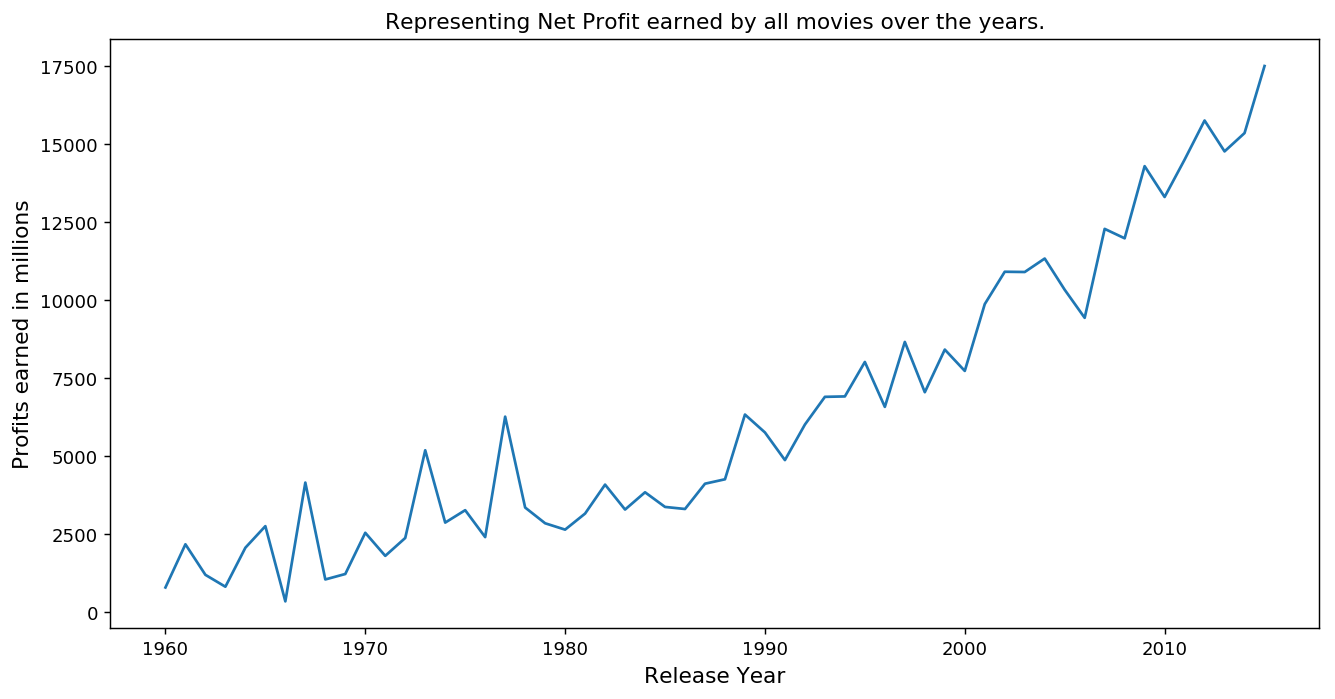

In [559]:
#Lets take a look into profit trend in the adjusted amounts to get more comparable data.  
profit_adj = df_rev.groupby('release_year')['profit_adj'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year', fontsize = 12)
#on y-axis
plt.ylabel('Profits earned in millions', fontsize = 12)
#title of the line plot
plt.title('Representing Net Profit earned by all movies over the years.')

#plotting the graph
plt.plot(profit_adj)

#displaying the line plot
plt.show()

**Observation:** Per trend analysis movie industry has clearly become more profitable over the years. There are a few spikes and drops along the way but the trajectory overall has been upwards. There seems to be higher swings in between 1960-1980. One possible explanation for those swings could be inflation and economics in those years. Lets take a look further at original dollar values. 

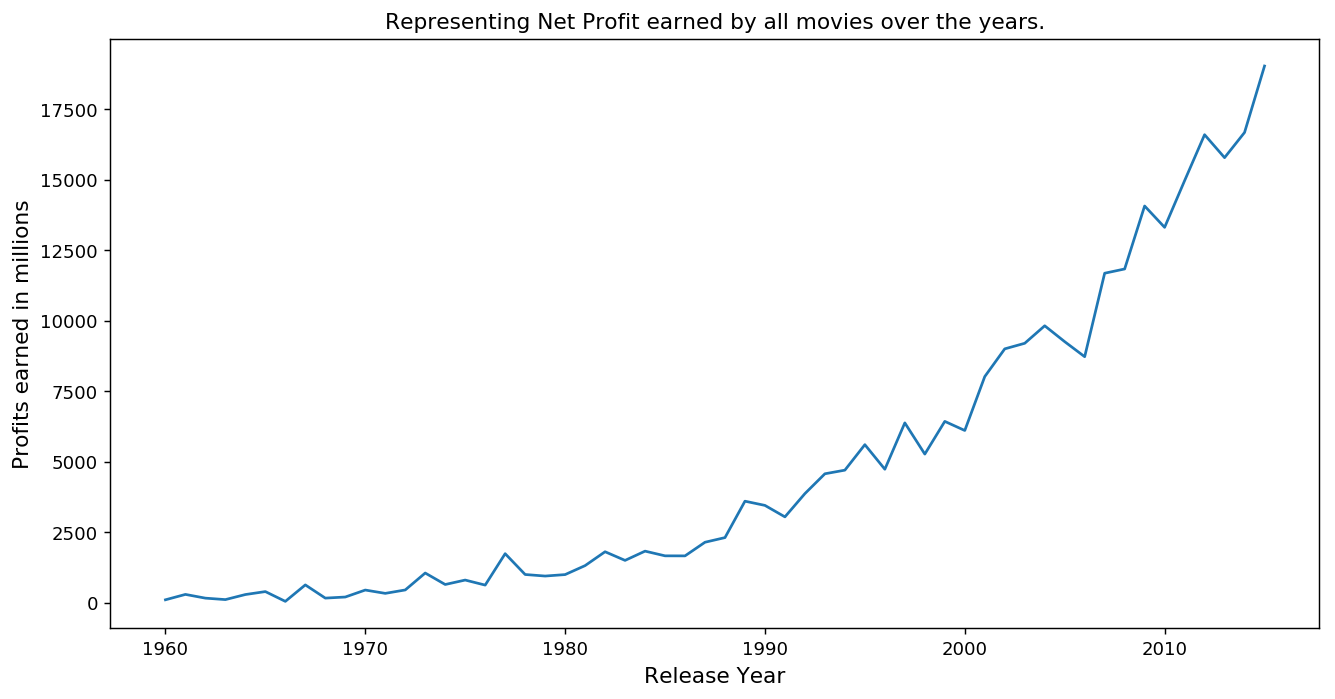

In [560]:
#Lets now look at profit in original dollar value: 
profit = df_rev.groupby('release_year')['profit'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year', fontsize = 12)
#on y-axis
plt.ylabel('Profits earned in millions', fontsize = 12)
#title of the line plot
plt.title('Representing Net Profit earned by all movies over the years.')

#plotting the graph
plt.plot(profit)

#displaying the line plot
plt.show()

**Observation:** In original dollar value the trend looks a lot smoother, the above adjusted values were driven mainly by inflation. 

<a id='conclusions'></a>
## Conclusions

> To investigate the questions posed in this analysis, I gathered understanding of the dataset for years from 1960-2010s, performed data wrangling and made a few assumptions. There were some limitations in the data: 
> 1) Certain columns, like ‘cast’ and ‘genres’, contained multiple values separated by pipe (|) characters. There are some odd characters in the ‘cast’ column;
> 2) Not all movies contained both budget and revenue information; 
> In order to address those limitations, I made the following assumptions: 
> 1) 'genres' column impacted our ability to answer Q2 given multiple variations of genres and inconsistency in the data. Therefore, I made the assumption that the first genre in the list before the pipe is the primary genre, creating a new column for updated genre names. 
> 2) For Q4 we only considered the movies with both budget and revenue data, therefore number of movies included in this investigation was only 1/3 of total population. 

> Observations from the data gathered from posed questions: 

> **Q1. Which movie was the most popular, which received highest average vote and which movie received highest number of votes?**
> * The movie with the highest popularity score is **Jurassic World**
> * The movie with the highest average vote is **The Story of Film: An Odyssey**, which also appears to be the one with the longest runtime (900 minutes)
> * The movie with the highest number of votes is **Inception** which received 9767 votes. 

> **Q2. Which genres are most popular from year to year?** 
> * *History* genre obtained highest popularity level in 1960s, however it declined in the following years; 
> * *Comedy* looks pretty consistent over the years and has consistently high popularity score;
> * *Adventure* was most popular in the 1970s and declined in later years. It gained back popularity in 2000 and been consistent ever since. 
> * 2000s was the decade of *Fantasy* and it slowly lost popularity in 2010s giving room for *Science Fiction* which started gaining more popularity. 
> * *Western* appears to have the most popularity in the 2010s. 

> **Q3. How did popularity of movies change over the years?**
> Overall, per above chart the number of movies has been rising over the years, however proportion of popular movies look consistent. Visually 1980s seem to have lower proportion of popular movies. 2000-2010 has consistent proportion of popular movies.

> **Q4. Has movie industry become more profitable over time?**
> Per trend analysis based on adjusted profit movie industry has clearly become more profitable over the years. There are a few spikes and drops along the way but the trajectory overall has been upwards. There seems to be higher swings in between 1960-1980. Further trend analysis based on original profit amounts displayed smoother trend, meaning the swings we observed were due to inflation and economics in those years. 



In [562]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset_TMDb_Movie.ipynb'])

0